# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     801.5
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           1.06e-39
Time:                        12:52:31   Log-Likelihood:                -2.4830
No. Observations:                  50   AIC:                             12.97
Df Residuals:                      46   BIC:                             20.61
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0220      0.090     55.576      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.50798074  5.00839223  5.46673021  5.85355891  6.15006578  6.35115231
  6.46627176  6.51787596  6.53772657  6.56167672  6.62378044  6.75069769
  6.95731418  7.24429572  7.5979788   7.9926155   8.39460376  8.76800815
  9.08046391  9.30849442  9.44136834  9.48286273  9.45064249  9.37335808
  9.28593832  9.22385166  9.21727887  9.28615438  9.43689113  9.66132691
  9.93806545 10.2359917  10.51938399 10.75378298 10.91165323 10.97690722
 10.94754843 10.83599943 10.66706084 10.47383666 10.29229542 10.1553606
 10.08750141 10.10071259 10.19254369 10.34650167 10.53476066 10.72273369
 10.87475521 10.95994085]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.94347215 10.78490338 10.5054158  10.15327882  9.79203196  9.48492815
  9.27944725  9.19567127  9.22136763  9.31498409]


## Plot comparison

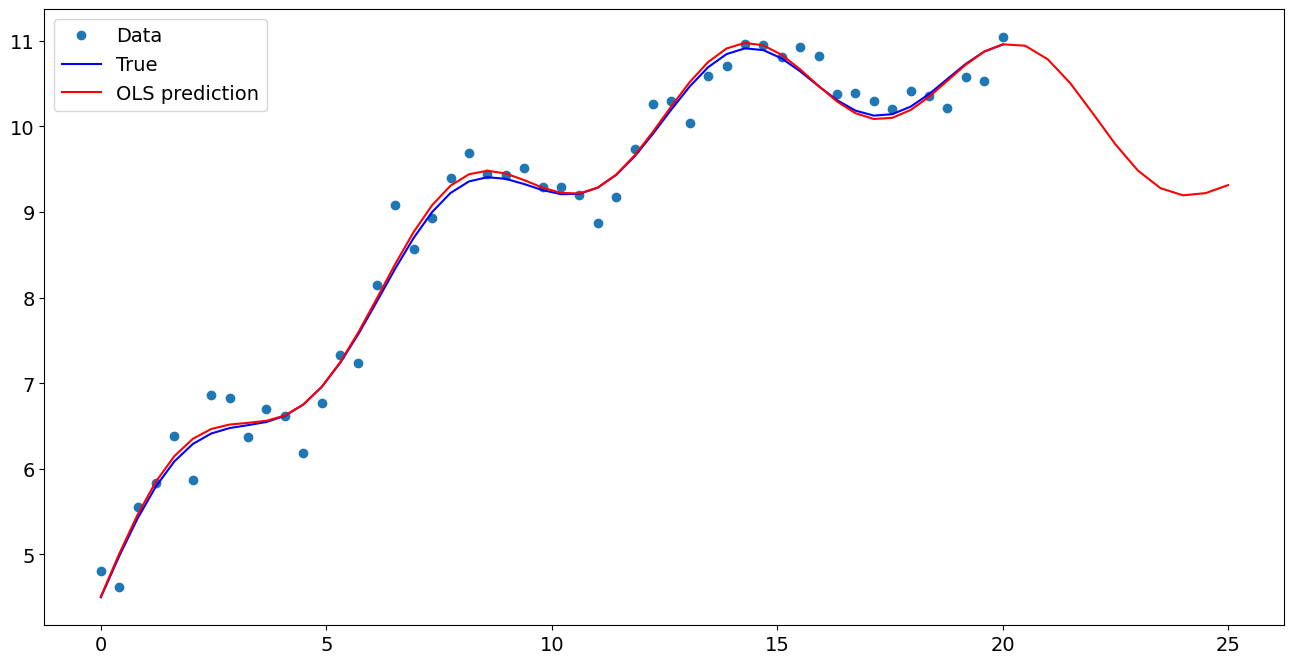

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.021999
x1                  0.503551
np.sin(x1)          0.540115
I((x1 - 5) ** 2)   -0.020561
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.943472
1    10.784903
2    10.505416
3    10.153279
4     9.792032
5     9.484928
6     9.279447
7     9.195671
8     9.221368
9     9.314984
dtype: float64